In [1]:
import numpy as np
from scipy.special import softmax

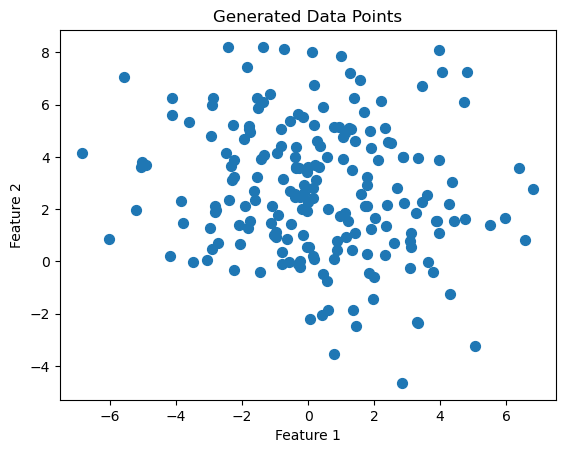

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


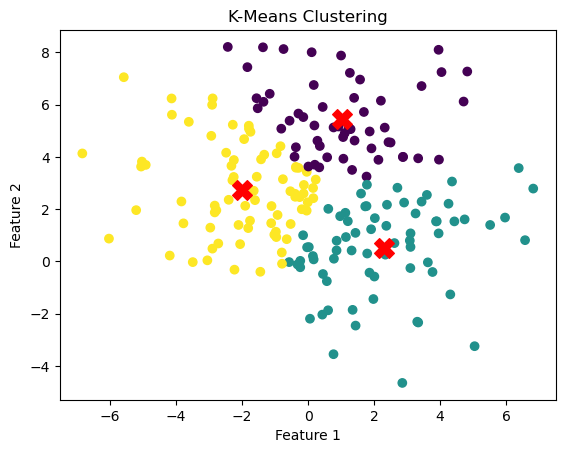

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# generate random data
np.random.seed(0)
X, y = make_blobs(n_samples=200, centers=3, n_features=2, cluster_std=2, random_state=0)

# plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# create the k-means model
kmeans = KMeans(n_clusters=3, random_state=0)

# fit the model to the data
kmeans.fit(X)

# plot the clustered data with centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8672 - loss: 0.4486 - val_accuracy: 0.9683 - val_loss: 0.1115
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9651 - loss: 0.1116 - val_accuracy: 0.9705 - val_loss: 0.0982
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9770 - loss: 0.0722 - val_accuracy: 0.9743 - val_loss: 0.0912
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9826 - loss: 0.0541 - val_accuracy: 0.9800 - val_loss: 0.0745
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9880 - loss: 0.0392 - val_accuracy: 0.9765 - val_loss: 0.0880
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.9713 - loss: 0.0991

Test Accuracy: 0.9731
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


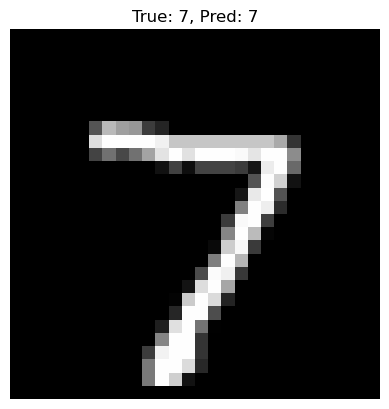

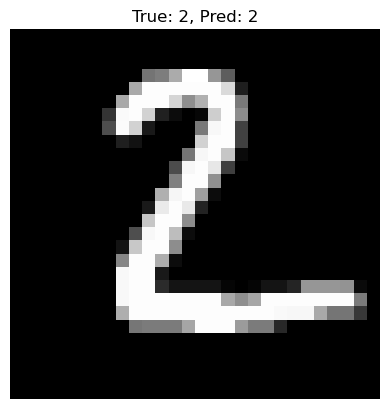

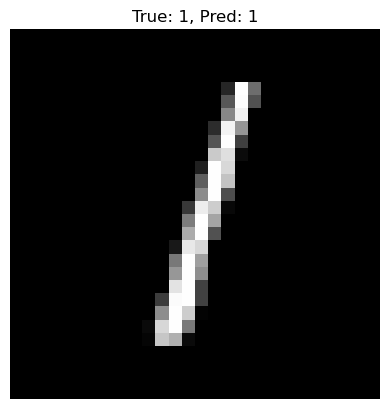

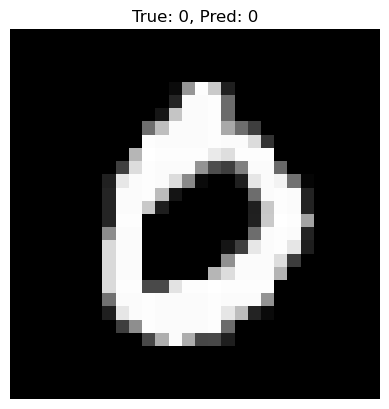

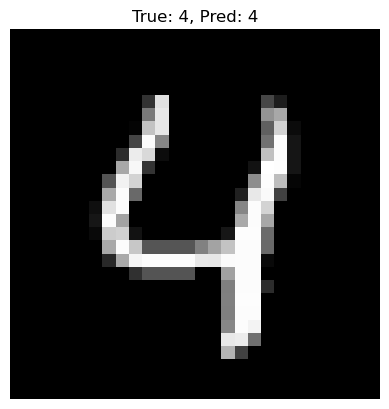

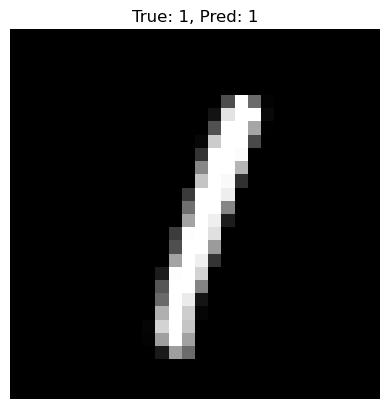

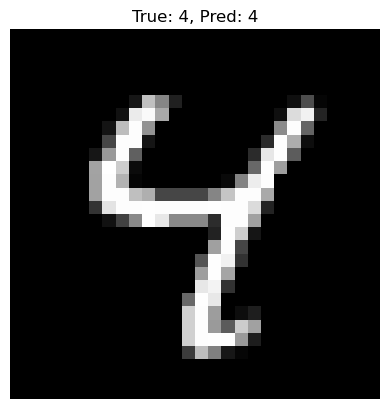

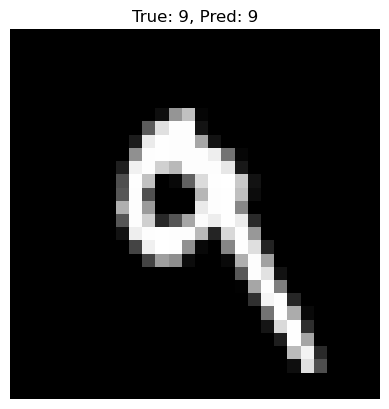

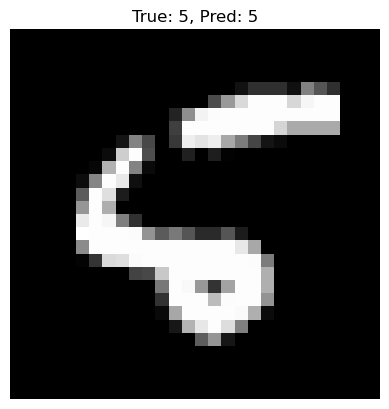

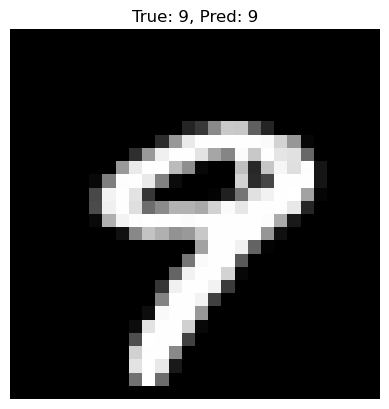

In [6]:
import tensorflow as tf
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.utils import to_categorical
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical  # ✅ Add this
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),           # Flatten the 28x28 images to 784-dim vectors
    Dense(128, activation='relu'),           # Hidden layer
    Dense(64, activation='relu'),            # Another hidden layer
    Dense(10, activation='softmax')          # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=32)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Plot some predictions
import numpy as np
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:10], axis=1)

# Plot results
for i in range(10):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()
